In [1]:
#Converting CSV File to JSON

import csv 
import json 

def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []
      
    #read csv file
    with open(csvFilePath, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)
          
csvFilePath = r'/Volumes/T7/DAP/games.csv'
jsonFilePath = r'/Volumes/T7/DAP/games.json'
csv_to_json(csvFilePath, jsonFilePath)


#csv to json for League

 

def csv_to_json_League(csvFilePathLeague, jsonFilePathLeague):
    jsonArray = []
      
    #read csv file
    with open(csvFilePathLeague, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePathLeague, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)
          
csvFilePathLeague = r'/Volumes/T7/DAP/leagues.csv'
jsonFilePathLeague = r'/Volumes/T7/DAP/leagues.json'
csv_to_json(csvFilePathLeague, jsonFilePathLeague)

#csv to json for Teams

def csv_to_json_Teams(csvFilePathTeams, jsonFilePathTeams):
    jsonArray = []
      
    #read csv file
    with open(csvFilePathTeams, encoding='utf-8') as csvf: 
        #load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf) 

        #convert each csv row into python dict
        for row in csvReader: 
            #add this python dict to json array
            jsonArray.append(row)
  
    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePathLeague, 'w', encoding='utf-8') as jsonf: 
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)
csvFilePathTeams = r'/Volumes/T7/DAP/teams.csv'
jsonFilePathTeams = r'/Volumes/T7/DAP/teams.json'
csv_to_json(csvFilePathTeams, jsonFilePathTeams)



In [109]:
#Creating Tables in Mongodb and inserting data in those tables


import json

from pymongo import MongoClient
  
try:
    conn = MongoClient()
    print("Connected successfully!!!")
except:  
    print("Could not connect to MongoDB")
client = MongoClient('localhost', 27017)
db = client['DAP']
collection_games = db['games']
collection_leagues = db['leagues']
collection_teams = db['teams']

with open('/Volumes/T7/DAP/games.json') as f:
    file_data_games = json.load(f)
    

with open('/Volumes/T7/DAP/leagues.json') as l:
    file_data_leagues = json.load(l)
    
    
with open('/Volumes/T7/DAP/teams.json') as t:
    file_data_teams = json.load(t)
    
    
#collection_currency.insert(file_data)

#if isinstance(file_data, list):
collection_games.insert_many(file_data_games)  
collection_leagues.insert_many(file_data_leagues) 
collection_teams.insert_many(file_data_teams) 
#else:
 #   Collection.insert_one(file_data)

Connected successfully!!!


In [110]:
#Getting the data from mongo db in data frames 

import pandas as pd
# Getting games from mongo db

cursor=collection_games.find()
collection_games=pd.DataFrame(list(cursor))
collection_games


# Getting League from Mongo DB

#cursor=collection_leagues.find()
#collection_leagues=pd.DataFrame(list(cursor))
#collection_leagues


,_id,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,626159eb1fb0631cb579f2b6,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,...,5.9,1.62,3.6,6,1.67,4,5.75,1.64,4.07,6.04
1,626159eb1fb0631cb579f2b7,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,...,4.27,1.91,3.5,4,2,3.5,4.2,1.82,3.88,4.7
2,626159eb1fb0631cb579f2b8,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,...,5.62,1.73,3.5,5,1.73,3.9,5.4,1.75,3.76,5.44
3,626159eb1fb0631cb579f2b9,84,1,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,...,4.34,2,3.1,2.7,2,3.4,4.33,1.79,3.74,5.1
4,626159eb1fb0631cb579f2ba,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,...,3.08,2.6,3.1,2.88,2.6,3.25,3,2.46,3.39,3.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,626159eb1fb0631cb57a2439,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,0.2812,...,6.2,1.5,4.5,6,1.5,4.33,6,1.58,4.36,6.18
12676,626159eb1fb0631cb57a243a,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,0.3367,...,3.32,2.5,2.9,3.2,2.4,3.1,3,2.66,3.28,2.93
12677,626159eb1fb0631cb57a243b,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,0.6719,...,9.41,1.32,5.25,9,1.3,5.25,9,1.23,6.85,12.59
12678,626159eb1fb0631cb57a243c,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0.3541,...,10.67,1.29,5.25,11,1.29,5.25,9.5,1.29,5.97,10.8


In [111]:
# Deleting the columns which are not required
collection_games=collection_games.drop(columns="_id")



In [112]:
collection_games=collection_games.drop(columns="PSA")

In [113]:
collection_games=collection_games.drop(columns="WHH")

In [114]:
collection_games=collection_games.drop(columns="WHD")

In [115]:
collection_games=collection_games.drop(columns="WHA")

In [116]:
collection_games=collection_games.drop(columns="VCH")

In [117]:
collection_games=collection_games.drop(columns="VCD")

In [118]:
collection_games=collection_games.drop(columns="PSCH")

In [119]:
collection_games=collection_games.drop(columns="PSCD")

In [120]:
collection_games=collection_games.drop(columns="PSCA")

In [121]:
collection_games=collection_games.drop(columns="B365A")

In [122]:
collection_games=collection_games.drop(columns="B365D")

In [123]:
collection_games.isnull().sum()

gameID               0
leagueID             0
season               0
date                 0
homeTeamID           0
awayTeamID           0
homeGoals            0
awayGoals            0
homeProbability      0
drawProbability      0
awayProbability      0
homeGoalsHalfTime    0
awayGoalsHalfTime    0
B365H                0
BWH                  0
BWD                  0
BWA                  0
IWH                  0
IWD                  0
IWA                  0
PSH                  0
PSD                  0
VCA                  0
dtype: int64

In [124]:
# Getting League from Mongo DB

cursor=collection_leagues.find()
collection_leagues=pd.DataFrame(list(cursor))
collection_leagues

,_id,leagueID,name,understatNotation
0,626159ec1fb0631cb57a243e,1,Premier League,EPL
1,626159ec1fb0631cb57a243f,2,Serie A,Serie_A
2,626159ec1fb0631cb57a2440,3,Bundesliga,Bundesliga
3,626159ec1fb0631cb57a2441,4,La Liga,La_liga
4,626159ec1fb0631cb57a2442,5,Ligue 1,Ligue_1


In [125]:
collection_leagues=collection_leagues.drop(columns="_id")

In [126]:
# Getting Teams from Mongo DB
import pandas as pd
cursor=collection_teams.find()
collection_teams=pd.DataFrame(list(cursor))
collection_teams

,_id,teamID,name
0,626159ec1fb0631cb57a2443,71,Aston Villa
1,626159ec1fb0631cb57a2444,72,Everton
2,626159ec1fb0631cb57a2445,74,Southampton
3,626159ec1fb0631cb57a2446,75,Leicester
4,626159ec1fb0631cb57a2447,76,West Bromwich Albion
...,...,...,...
141,626159ec1fb0631cb57a24d0,182,Nancy
142,626159ec1fb0631cb57a24d1,224,Amiens
143,626159ec1fb0631cb57a24d2,225,Strasbourg
144,626159ec1fb0631cb57a24d3,235,Nimes


In [127]:
collection_teams=collection_teams.drop(columns="_id")


In [3]:
#connecting to postgre
import psycopg2

#conn = psycopg2.connect("dbname=postgres user=postgres password=postgres")
try:
    conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="Jenny@123456")

except:
    print("There is an error while connecting")
    


In [131]:
# Creating a new database teamstats

try:    
    conn.autocommit = True

#Creating a cursor object using the cursor() method
    cursor = conn.cursor()

#Preparing query to create a database
    sql = ''' CREATE database teamstats ''';

#Creating a database
    cursor.execute(sql)
    print("Database created successfully........")

#Closing the connection
conn.close()
    
except:
    print("There is an error while connecting") 

SyntaxError: invalid syntax (3582677269.py, line 17)

In [7]:
import psycopg2

#connecting to the teamstats database
try:
    conn = psycopg2.connect(
    host="localhost",
    database="teamstats",
    user="postgres",
    password="Jenny@123456")

except:
    print("There is an error while connecting")

In [11]:


try:
    conn.autocommit = True

#Creating a cursor object using the cursor() method
    cursor = conn.cursor()

    
    cursor.execute("CREATE TABLE games_value (gameID INT,leagueID INT PRIMARY KEY, season varchar(255), date TIMESTAMP, homeTeamID INT, awayTeamID INT, homeGoals INT, awayGoals INT, homeProbability FLOAT, drawProbability FLOAT, awayProbability FLOAT, homeGoalsHalfTime INT, awayGoalsHalfTime INT);")
    #cursor.execute("CREATE TABLE leagueno (leagueID INT FOREIGN KEY REFERENCES games_value(leagueID), name varchar(255), underNotation varchar(255));")
    cursor.execute("CREATE TABLE leagueno (leagueID INT, name varchar(255), underNotation varchar(255),FOREIGN KEY(leagueID) REFERENCES games_value(leagueID));")
except:
    print("I can't create the table!")
    
conn.commit() # <--- makes sure the change is shown in the database




In [96]:
# Inserting data from Panda dataframe into Postgre Table

for i in range(len(collection_games)):
    cursor.execute("insert into gamesvalue values ({},{},'{}','{}',{},{},{},{},{},{},{},{},{})".format(collection_games['gameID'][i],collection_games['leagueID'][i],collection_games['season'][i],collection_games['date'][i],collection_games['homeTeamID'][i],collection_games['awayTeamID'][i],collection_games['homeGoals'][i],collection_games['awayGoals'][i],collection_games['homeProbability'][i],collection_games['drawProbability'][i],collection_games['awayProbability'][i],collection_games['homeGoalsHalfTime'][i],collection_games['awayGoalsHalfTime'][i]))
    

In [124]:
# Inserting Collection_leagues in Postgre

for i in range(len(collection_leagues)):
    cursor.execute("insert into leagueno values ({},'{}','{}')".format(collection_leagues['leagueID'][i],collection_leagues['name'][i],collection_leagues['understatNotation'][i]))

NameError: name 'collection_leagues' is not defined

In [3]:
# Importing data From Postgre Table gamesdata and league in pandas dataframe for visualization

import pandas as pds
gamesdata       = pds.read_sql('select * from gamesvalue ',conn)
gamesdata



,gameid,leagueid,season,date,hometeamid,awayteamid,homegoals,awaygoals,homeprobability,drawprobability,awayprobability,homegoalshalftime,awaygoalshalftime
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,0.3158,1,0
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,0.2926,0,0
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,0.2675,0,1
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,0.2057,0.1521,3,0
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,0.2159,0.6380,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38035,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,0.2812,0.2671,0.4517,1,1
38036,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,0.3367,0.2999,0.3634,1,1
38037,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,0.6719,0.2502,0.0779,1,0
38038,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0.3541,0.3010,0.3449,0,1


In [4]:

#import pandas as pds
leaguedata       = pds.read_sql('select * from leagueno ',conn)

leaguedata

,leagueid,name,undernotation
0,1,Premier League,EPL
1,2,Serie A,Serie_A
2,3,Bundesliga,Bundesliga
3,4,La Liga,La_liga
4,5,Ligue 1,Ligue_1


In [88]:
#Merging the games and laegues tables to get the league name
import pandas as pds
df_merge=pds.merge(gamesdata, leaguedata, on="leagueid")
df_merge

,gameid,leagueid,season,date,hometeamid,awayteamid,homegoals,awaygoals,homeprobability,drawprobability,awayprobability,homegoalshalftime,awaygoalshalftime,name,undernotation
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,0.3158,1,0,Premier League,EPL
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,0.2926,0,0,Premier League,EPL
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,0.2675,0,1,Premier League,EPL
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,0.2057,0.1521,3,0,Premier League,EPL
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,0.2159,0.6380,0,1,Premier League,EPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38035,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,0.2812,0.2671,0.4517,1,1,Ligue 1,Ligue_1
38036,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,0.3367,0.2999,0.3634,1,1,Ligue 1,Ligue_1
38037,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,0.6719,0.2502,0.0779,1,0,Ligue 1,Ligue_1
38038,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0.3541,0.3010,0.3449,0,1,Ligue 1,Ligue_1


In [6]:
# Calculating mean of homegoals based on season

import pandas as pd
homegoals_season=gamesdata.groupby('season')['homegoals'].mean()
homegoals_season

season
2014    1.498357
2015    1.514786
2016    1.625753
2017    1.530120
2018    1.543812
2019    1.543768
2020    1.476451
Name: homegoals, dtype: float64

<AxesSubplot:xlabel='season'>

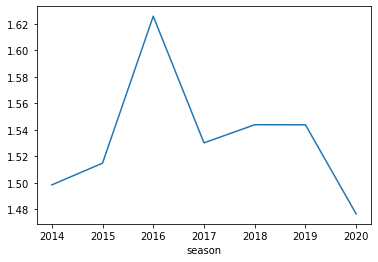

In [7]:
# Creating graph for average homegoals per season 
# importing the required module
import matplotlib.pyplot as plt
 

 
homegoals_season.plot(x ='season', y='homegoals')

In [50]:
# Calculating mean of awaygoals based on season

import pandas as pd
awaygoals_season=gamesdata.groupby('season')['awaygoals'].mean().to_frame().reset_index()
awaygoals_season



,season,awaygoals
0,2014,1.129244
1,2015,1.154436
2,2016,1.208767
3,2017,1.179080
4,2018,1.204819
5,2019,1.248116
6,2020,1.324206


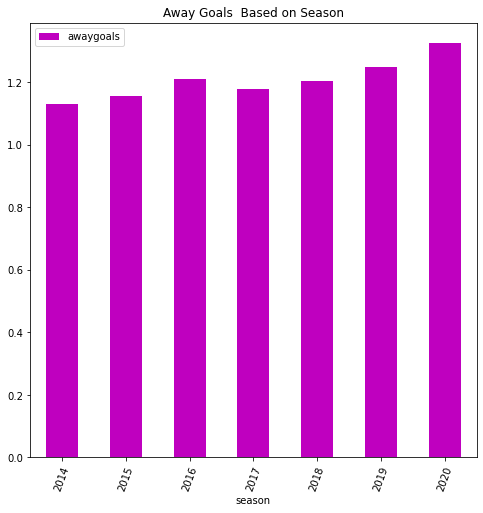

In [57]:
# Creating graph for average awaygoals per season 

import matplotlib.pyplot as plt
 

 
awaygoals_season.plot.bar(x="season", y="awaygoals", rot=70, title="Away Goals  Based on Season",grid=False, figsize=(8, 8),color='m');

In [46]:
# calculating average homegaols in half time

import pandas as pd
homegoalshalftime_season=gamesdata.groupby('season')['homegoalshalftime'].mean().to_frame().reset_index()
homegoalshalftime_season

,season,homegoalshalftime
0,2014,0.693319
1,2015,0.667032
2,2016,0.706301
3,2017,0.673604
4,2018,0.634721
5,2019,0.681159
6,2020,0.662651


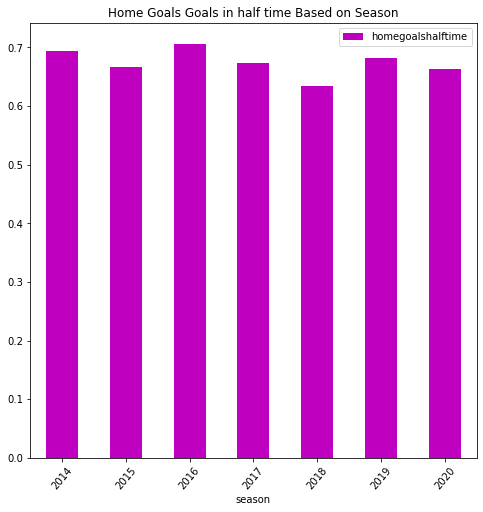

In [64]:
# Plotting average goals for half time
homegoalshalftime_season.plot.bar(x="season", y="homegoalshalftime", rot=50, title="Home Goals in half time Based on Season",grid=False, figsize=(8, 8),color='m');

In [41]:
#calculating average awaygoals in halftime

import pandas as pd
awaygoalshalftime_season=gamesdata.groupby('season')['awaygoalshalftime'].mean().to_frame().reset_index()
awaygoalshalftime_season
awaygoalshalftime_season

,season,awaygoalshalftime
0,2014,0.500548
1,2015,0.512048
2,2016,0.500822
3,2017,0.509310
4,2018,0.516429
5,2019,0.544928
6,2020,0.600767


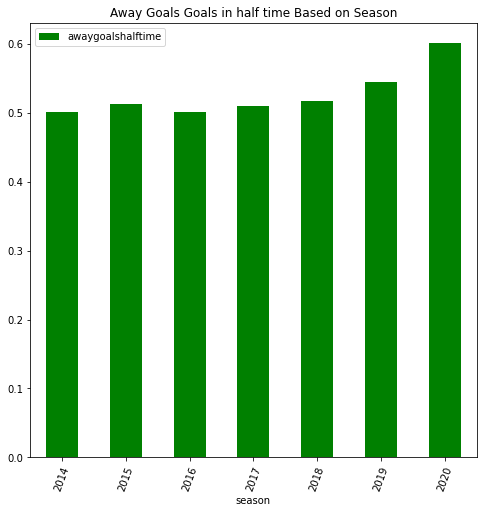

In [45]:
# Plotting average goals for half time


awaygoalshalftime_season.plot.bar(x="season", y="awaygoalshalftime", rot=70, title="Away Goals Goals in half time Based on Season",grid=False, figsize=(8, 8),color='g');

In [35]:
import pandas as pd
homegoalshalftime_league=df_merge.groupby('name')['homegoalshalftime'].mean().to_frame().reset_index()
homegoalshalftime_league

,name,homegoalshalftime
0,Bundesliga,0.718021
1,La Liga,0.662406
2,Ligue 1,0.639953
3,Premier League,0.680075
4,Serie A,0.677068


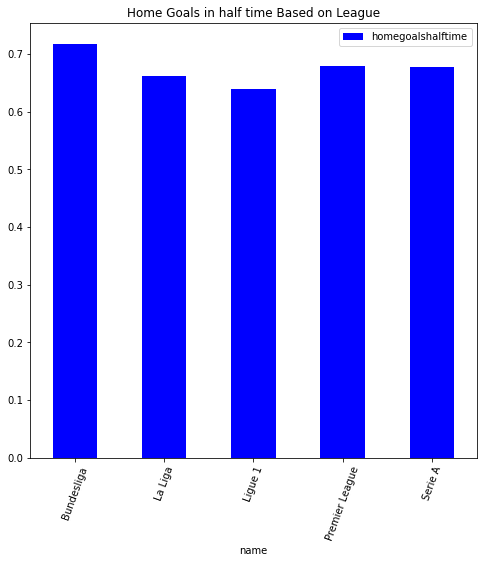

In [40]:
# Plotting home goalshalf time based on league



homegoalshalftime_league.plot.bar(x="name", y="homegoalshalftime", rot=70, title="Home Goals in half time Based on League",grid=False, figsize=(8, 8),color='b');

In [23]:
import pandas as pd
homegoals_league=df_merge.groupby('name')['homegoals'].mean().to_frame().reset_index()
homegoals_league


,name,homegoals
0,Bundesliga,1.648459
1,La Liga,1.517669
2,Ligue 1,1.469116
3,Premier League,1.504511
4,Serie A,1.546241


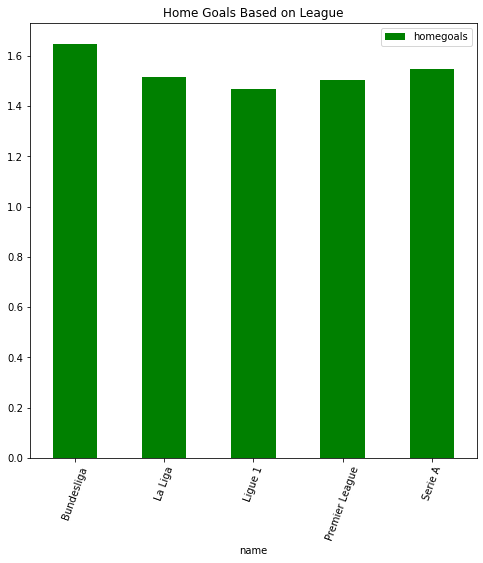

In [37]:
# Plotting home goals based on league


homegoals_league.plot.bar(x="name", y="homegoals", rot=70, title="Home Goals Based on League",grid=False, figsize=(8, 8),color='g');

In [59]:
import pandas as pd
awaygoals_league=df_merge.groupby('name')['awaygoals'].mean().to_frame().reset_index()
awaygoals_league



,name,awaygoals
0,Bundesliga,1.303922
1,La Liga,1.140977
2,Ligue 1,1.132916
3,Premier League,1.207143
4,Serie A,1.264286


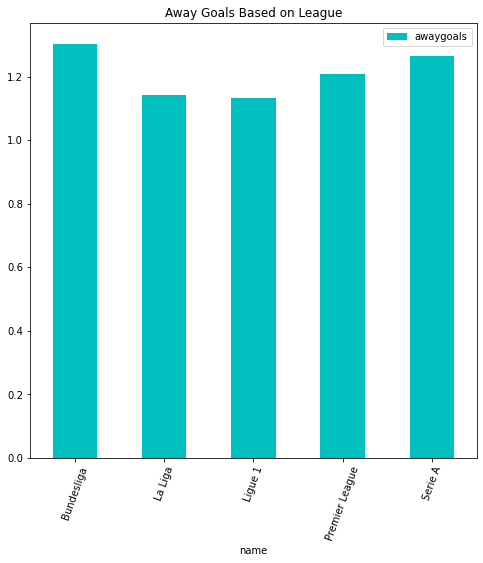

In [61]:
awaygoals_league.plot.bar(x="name", y="awaygoals", rot=70, title="Away Goals Based on League",grid=False, figsize=(8, 8),color='c');

In [79]:
# Merging home goals and awaygoals based on league for visualization

import pandas as pd

df_merge_Awayandhomegoals=pd.merge(awaygoals_league, homegoals_league, on="name")
df_merge_Awayandhomegoals=df_merge_Awayandhomegoals[['awaygoals','homegoals']].set_index(index,drop=True)
df_merge_Awayandhomegoals

,awaygoals,homegoals
name,,
Bundesliga,1.303922,1.648459
La Liga,1.140977,1.517669
Ligue 1,1.132916,1.469116
Premier League,1.207143,1.504511
Serie A,1.264286,1.546241


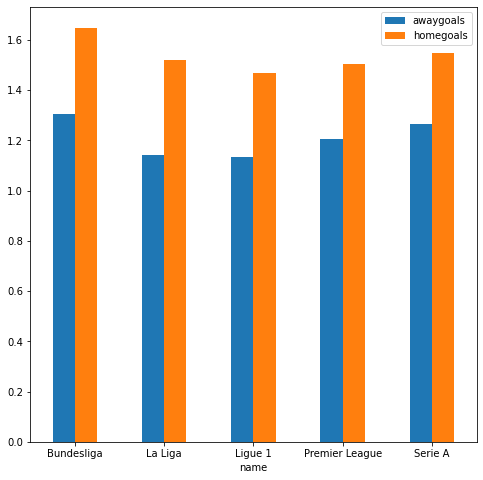

In [82]:
#df_merge_Awayandhomegoals
#index=df_merge_Awayandhomegoals['name']
ax = df_merge_Awayandhomegoals.plot.bar(rot=0,figsize=(8,8),grid=False)

In [90]:
import pandas as pd
awaygoalshalftime_league=df_merge.groupby('name')['awaygoalshalftime'].mean().to_frame().reset_index()
awaygoalshalftime_league


#df_merge_Awayandhomegoalshalftime=pd.merge(awaygoals_league, homegoalshalftime_league, on="name")

,name,awaygoalshalftime
0,Bundesliga,0.560224
1,La Liga,0.498496
2,Ligue 1,0.491400
3,Premier League,0.538722
4,Serie A,0.547744


In [92]:
# Merging home goals and awaygoals of half time based on league for visualization

import pandas as pd

df_merge_Awayandhomegoalshalftime=pd.merge(awaygoalshalftime_league, homegoalshalftime_league, on="name")
df_merge_Awayandhomegoalshalftime=df_merge_Awayandhomegoalshalftime[['awaygoalshalftime','homegoalshalftime']].set_index(index,drop=True)
df_merge_Awayandhomegoalshalftime

,awaygoalshalftime,homegoalshalftime
name,,
Bundesliga,0.560224,0.718021
La Liga,0.498496,0.662406
Ligue 1,0.491400,0.639953
Premier League,0.538722,0.680075
Serie A,0.547744,0.677068


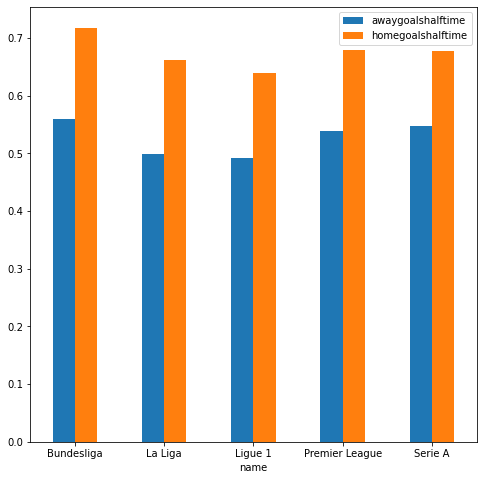

In [93]:
#df_merge_Awayandhomegoalshalftime

ax = df_merge_Awayandhomegoalshalftime.plot.bar(rot=0,figsize=(8,8),grid=False)

In [95]:
import pandas as pd
homeprobability_df=df_merge.groupby('name')['homeprobability'].mean().to_frame().reset_index()
homeprobability_df

,name,homeprobability
0,Bundesliga,0.450601
1,La Liga,0.461385
2,Ligue 1,0.444632
3,Premier League,0.443458
4,Serie A,0.442911


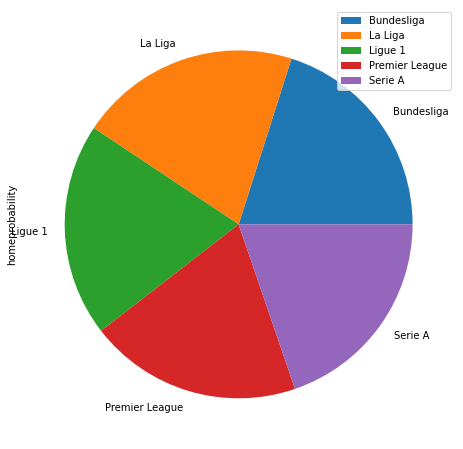

In [100]:
#Pie Chart showing HomeProbability of winning  Of each league

plot = homeprobability_df.set_index(homeprobability_df["name"]).plot.pie(y='homeprobability', figsize=(8, 8))

In [104]:
#Getting mean of draw probability based on league

import pandas as pd
drawprobability_df=df_merge.groupby('name')['drawprobability'].mean().to_frame().reset_index()
drawprobability_df

,name,drawprobability
0,Bundesliga,0.227868
1,La Liga,0.241938
2,Ligue 1,0.251913
3,Premier League,0.232498
4,Serie A,0.235185


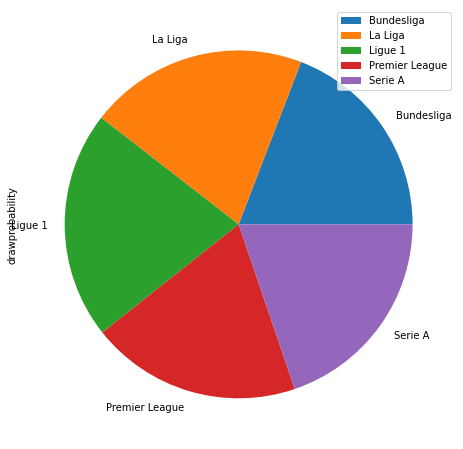

In [106]:
#Pie Chart showing Draw Probability of each league

plot = drawprobability_df.set_index(drawprobability_df["name"]).plot.pie(y='drawprobability', figsize=(8, 8))

In [107]:
import pandas as pd
awayprobability_df=df_merge.groupby('name')['awayprobability'].mean().to_frame().reset_index()
awayprobability_df



,name,awayprobability
0,Bundesliga,0.321531
1,La Liga,0.296676
2,Ligue 1,0.303455
3,Premier League,0.324044
4,Serie A,0.321904


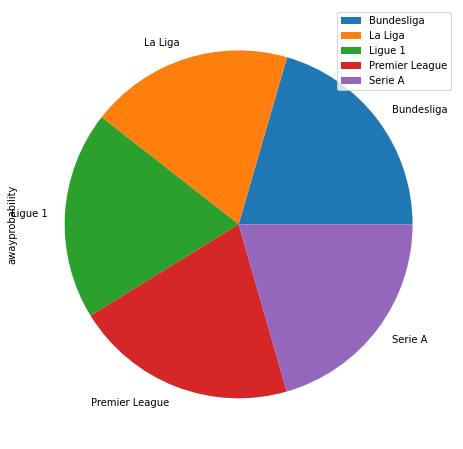

In [108]:
#Pie Chart for showing Away Probability of each league



plot = awayprobability_df.set_index(awayprobability_df["name"]).plot.pie(y='awayprobability', figsize=(8, 8))